# Linear Regression

Import needed libraries:

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

from sklearn import linear_model
from sklearn.metrics import r2_score

Create a DataFrame from .csv file and split into train and test samples

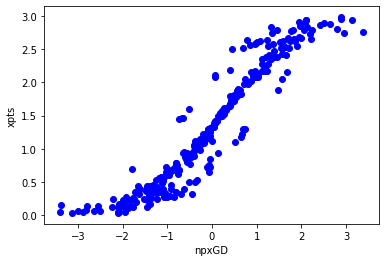

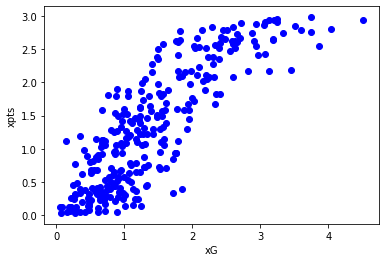

In [72]:
df = pd.read_csv("data/epl2020.csv")
#print(df.columns)

feature_to_predict = ['xpts']
list_of_train_features = ['npxGD','xG']
cdf = df[feature_to_predict + list_of_train_features]
#print(cdf.head(9))

msk = np.random.rand(len(df)) < 0.5
train = cdf[msk]
test = cdf[~msk]

for i_feature in list_of_train_features:
    plt.scatter(train[[i_feature]], train[feature_to_predict],  color='blue')
    plt.xlabel(i_feature)
    plt.ylabel(feature_to_predict[0])
    plt.show()

Create and train the model

In [73]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[list_of_train_features])
train_y = np.asanyarray(train[feature_to_predict])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.51801857 0.22348509]]
Intercept:  [1.04275704]


Visualization

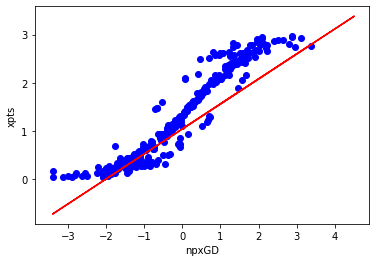

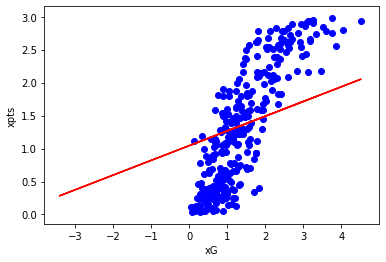

Residual sum of squares: 0.10
Variance score: 0.86


In [74]:
test_x = np.asanyarray(test[list_of_train_features])
test_y = np.asanyarray(test[feature_to_predict])
test_y_ = regr.predict(test_x)

for i_feature in range(0, len(list_of_train_features)) :
    plt.plot(train_x, regr.coef_[0][i_feature]*train_x + regr.intercept_, '-r')
    plt.scatter(train[[list_of_train_features[i_feature]]], train[feature_to_predict],  color='blue')
    plt.xlabel(list_of_train_features[i_feature])
    plt.ylabel(feature_to_predict[0])
    plt.show()
    
print("Residual sum of squares: %.2f"
      % np.mean((test_y_ - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))
